In [44]:
from pathlib import Path
# Params
PATH_OUTPUT=Path("../output-rodan/")
MODEL=""
CHECKPOINT=""
DATETIME_FORMAT="%a %b %d %H:%M:%S %Y"
SPECIES=[
    "Human",
    "Mouse",
    "Arabidopsis",
    "Poplar",
    "Yeast"
]

In [36]:
import datetime
import seaborn as sns
import pandas as pd
import numpy as np

## Training 

In [37]:
path_metrics = PATH_OUTPUT.joinpath("training/metrics.csv")
metrics = pd.read_csv(path_metrics, index_col=False)
metrics.tail()

,timestamp,epoch,train_loss,val_loss
25,Tue Jul 18 14:06:56 2023,26,0.781076,0.751272
26,Tue Jul 18 18:37:02 2023,27,0.770326,0.748579
27,Tue Jul 18 23:07:07 2023,28,0.759844,0.830594
28,Wed Jul 19 03:37:15 2023,29,0.749808,0.713859
29,Wed Jul 19 08:07:24 2023,30,0.740163,0.762022


Text(0, 0.5, 'CTC Loss')

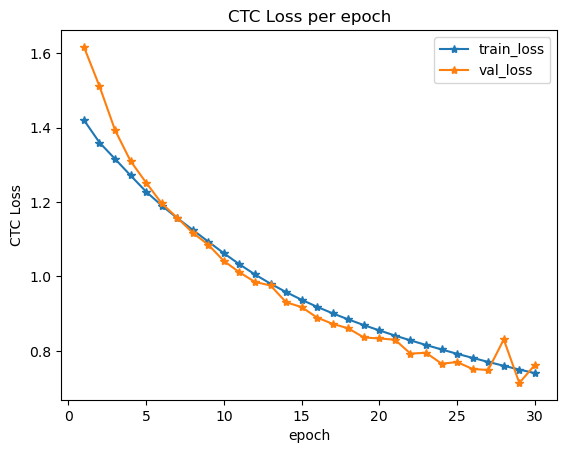

In [38]:
ax = metrics.plot(x="epoch", y=["train_loss","val_loss"], kind="line",marker="*")
ax.set_title("CTC Loss per epoch")
ax.set_ylabel("CTC Loss")

In [43]:
times=metrics["timestamp"]
str2datetime = lambda t: datetime.datetime.strptime(t,DATETIME_FORMAT)
avg_time_epoch=np.mean([ (str2datetime(tf)-str2datetime(ti)).total_seconds() / 60  for tf,ti in zip(times[1:],times[:-1])])

print(f"Average time per epoch: {avg_time_epoch} [min] | {avg_time_epoch/60} [hr]")

Average time per epoch: 269.9954022988506 [min] | 4.49992337164751 [hr]


### Basecalling
For each species, report:
- number of reads: 100.000
- number of mapped reads
- percentage of mapped reads
- accuracy of mapped reads
- total time spent in the basecalling
